In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

pd.options.display.max_columns = 500

### Загрузим датасет с машинами. Цель - верно восстанавливать для каждой из них цену продажи!

In [2]:
data = pd.read_csv('autos.csv')

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
### Колонка с тергетом - "selling price"

X = data.drop("selling_price", axis=1)
Y = data["selling_price"]

### Будем замерять MSLE!
### Поэтому прологарифмируем таргет
### А после оптимизируем MSE

Y = Y.apply(np.log1p)

In [5]:
### Разделим выборку на трейн и тест!

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

__Задание__ 

Реализуйте свой MeanTargetEncoder с добавленем некоторого шума!

Однажды в лекционном материале, обсуждая счетчики, мы говорили с вами о том, что из-за них модели могут переобучаться. Один из способов бороться с этим - валидировать расчеты среднего таргета (стратегия отложенной выборки / расчеты на кросс-валидации). Но есть еще проще!

Можно просто к значению счетчика добавить случайный шум (зашумить данные)!

Напомним, что рассчитываться новые признаки должны по такой формуле:

$$
g_j = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}{l} + C * \epsilon
$$



Пусть шум будет случайной величиной из нормального стандартного распределения, то есть $\epsilon \sim N(0, 1) $, а $ C = 0.006$.

Создавая свой класс-трансформер, наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`. Трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и список из числовых признаков. 

Если для какого-то признака в тестовой выборке отсутствует значение, трансформер должен поставить там 0.

На выходе должен получиться датасет того же размера с измененными категориальными признаками.

Класс MeanTargetEncoderNoise должен иметь следующую сигнатуру:



In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric):              
        ### Your code is here
        pass
    def fit(self, X, y):
        ### Your code is here

        return self
        
    def transform(self, df):
        ### Your code is here
        
        return temp

Разделите колонки на вещественные и категориальные. Приведите все категориальные колонки к типу `object`.

Далее применим наш кодировщик к `X_train, X_test`, так же как например мы применяем `StandardScaler`, чтобы проверить работоспособность нашего класса. Установите зерно датчика случайный чисел `np.random.seed(1)`.

После того, как вы изменили обучающую и тестовую выборки, сохраните первые 10 строк полученного промежуточного датафрейма обучающей выборки (`X_train`) в файл в формате csv с сепаратором `;`. Не забудьте индекс. Отправьте полученный файл в форму ниже.

Список колонок которые должны быть в файле для сдачи:
```py
cols = [
    "km_driven",
    "name",
    "year",
    "fuel",
    "seller_type",
    "transmission",
    "owner"
]
```

### Ваше решение


Разделение колонок на категориальные и числовые.

In [6]:
object_cols = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner']
num_cols = ['km_driven']

X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


In [8]:
mapping = {'year': Y.groupby(X['year']).mean()}
mapping

{'year': year
 1992    10.819798
 1995    11.461643
 1996    12.317649
 1997    11.338470
 1998    11.392866
 1999    11.129003
 2000    11.177787
 2001    11.363014
 2002    11.342487
 2003    11.268382
 2004    11.556526
 2005    11.483543
 2006    11.727260
 2007    11.812244
 2008    11.911333
 2009    12.156795
 2010    12.264658
 2011    12.411815
 2012    12.619788
 2013    12.858769
 2014    12.947612
 2015    13.039875
 2016    13.134919
 2017    13.343400
 2018    13.467398
 2019    13.559709
 2020    13.436909
 Name: selling_price, dtype: float64}

Реализация класса MeanTargetEncoderNoise.

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

C = 0.006

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric):
        self.categorical = categorical
        self.numeric = numeric
        self.mapping = {}

    def fit(self, X, y):
        X_fit = X.copy()
        Y_fit = y.copy()
        np.random.seed(1)

        for col in self.categorical:
            target = Y_fit.groupby(X_fit[col]).mean()
            self.mapping[col] = target + C * np.random.randn(target.shape[0])

        return self

    def transform(self, df):
        temp = df.copy()

        for col in self.categorical:
            temp[col] = temp[col].map(self.mapping[col])
            temp[col] = temp[col].fillna(0)
        
        return temp

Проверка работы трансформера.

In [10]:
np.random.normal(loc = 0.0, scale = 1.0, size =1)

array([0.08133635])

In [12]:
np.random.seed(1)
transformer = MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)

transformer.fit(X_train, Y_train)

train = transformer.transform(X_train)
test = transformer.transform(X_test)

train.head(10)

,name,year,km_driven,fuel,seller_type,transmission,owner
3294,13.483692,13.436559,50000,13.093756,12.615863,13.771135,12.977730
2290,12.117029,11.903115,70000,12.453832,12.615863,13.771135,12.977730
874,12.310456,13.328864,50000,12.453832,12.615863,12.639805,12.977730
1907,12.491443,13.042359,92198,12.453832,13.152824,12.639805,12.463313
3244,12.390906,12.870886,3240,12.453832,12.615863,12.639805,12.463313
1089,12.687432,13.436559,10000,12.453832,13.152824,12.639805,12.977730
3902,11.698702,11.503504,90000,12.453832,12.615863,12.639805,11.878390
2215,11.120678,11.503504,79000,12.453832,12.615863,12.639805,12.463313
3862,13.172879,13.328864,99700,13.093756,12.615863,12.639805,12.977730
705,13.004194,12.241213,124000,13.093756,12.615863,12.639805,12.463313


In [13]:
train.head(10).reset_index(drop=True).to_csv("step5.csv", sep=";", index=False)

Обучите несколько деревьев, перебирая максимальную глубину алгоритма из списка `max_depth_list`, а остальные параметры оставьте дефолтными. Выведите лучшее значение гиперпараметра. Постройте график зависимости MSLE на тестовой выборке от значения гиперпараметра. Воспользуйтесь `Pipeline` без `GridSearch`. Проделайте то же самое с `min_samples_split`, `min_impurity_decrease`, `max_leaf_nodes`. (по 2б на каждый параметр)

In [14]:
max_depth_list = [3, 5, 8, 12]
min_samples_split_list = [10, 50, 100, 500]
min_impurity_decrease_list = [0, 0.1, 0.15, 0.2]
max_leaf_nodes_list = [100, 200, 500]

max_depth: 3  MSE ==  0.798
max_depth: 5  MSE ==  1.442
max_depth: 8  MSE ==  1.987
max_depth: 12  MSE ==  1.984


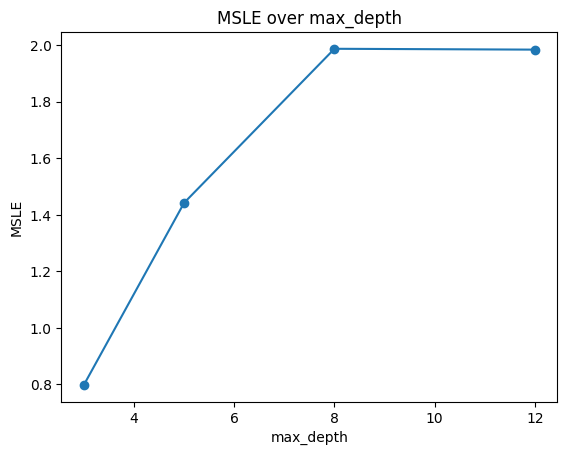

In [19]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

np.random.seed(1)

### Your code is here

metrics = []

for depth in max_depth_list:
    pipe = Pipeline([("custom_transformer", MeanTargetEncoderNoise(object_cols, num_cols)),
                    ("tree", DecisionTreeRegressor(max_depth=depth))])

    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(X_test)

    score = round(mse(Y_test, y_pred), 3)
    metrics.append(score)

    print(f"max_depth: {depth}  MSE == ", score)

plt.plot(max_depth_list, metrics, marker="o", linestyle="-")
plt.title("MSLE over max_depth")
plt.xlabel("max_depth")
plt.ylabel("MSLE")
plt.show()



min_samples: 10  MSE ==  1.431
min_samples: 50  MSE ==  1.437
min_samples: 100  MSE ==  0.951
min_samples: 500  MSE ==  0.808


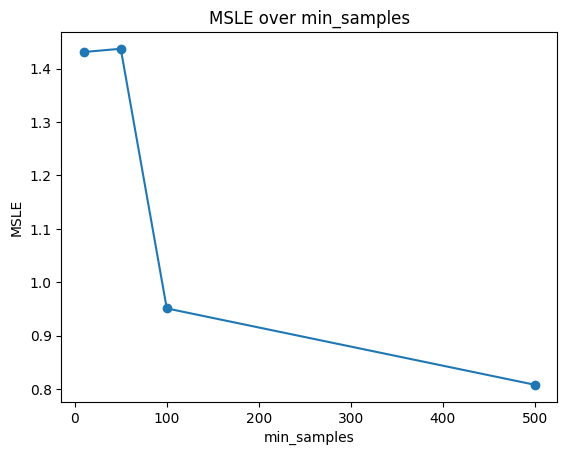

In [21]:
np.random.seed(1)

metrics = []

for min_samples in min_samples_split_list:
    pipe = Pipeline([("custom_transformer", MeanTargetEncoderNoise(object_cols, num_cols)),
                    ("tree", DecisionTreeRegressor(min_samples_split=min_samples))])

    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(X_test)

    score = round(mse(Y_test, y_pred), 3)
    metrics.append(score)

    print(f"min_samples: {min_samples}  MSE == ", score)

plt.plot(min_samples_split_list, metrics, marker="o", linestyle="-")
plt.title("MSLE over min_samples")
plt.xlabel("min_samples")
plt.ylabel("MSLE")
plt.show()

min_impurity_decrease: 0  MSE ==  1.982
min_impurity_decrease: 0.1  MSE ==  0.523
min_impurity_decrease: 0.15  MSE ==  0.523
min_impurity_decrease: 0.2  MSE ==  0.523


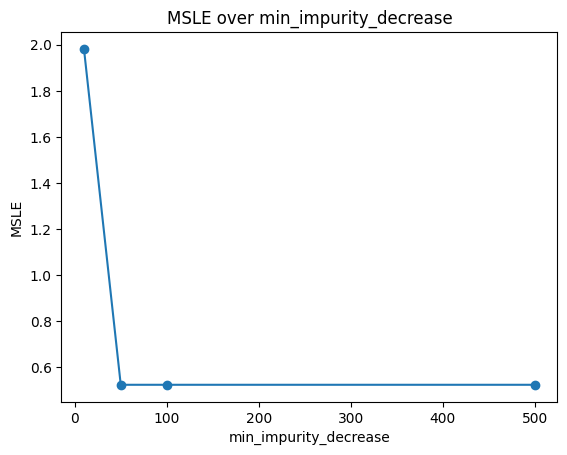

In [23]:
np.random.seed(1)

metrics = []

for min_impurity in min_impurity_decrease_list:
    pipe = Pipeline([("custom_transformer", MeanTargetEncoderNoise(object_cols, num_cols)),
                    ("tree", DecisionTreeRegressor(min_impurity_decrease=min_impurity))])

    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(X_test)

    score = round(mse(Y_test, y_pred), 3)
    metrics.append(score)

    print(f"min_impurity_decrease: {min_impurity}  MSE == ", score)

plt.plot(min_samples_split_list, metrics, marker="o", linestyle="-")
plt.title("MSLE over min_impurity_decrease")
plt.xlabel("min_impurity_decrease")
plt.ylabel("MSLE")
plt.show()

max_leaf_nodes: 100  MSLE ==  1.988
max_leaf_nodes: 200  MSLE ==  1.984
max_leaf_nodes: 500  MSLE ==  1.979


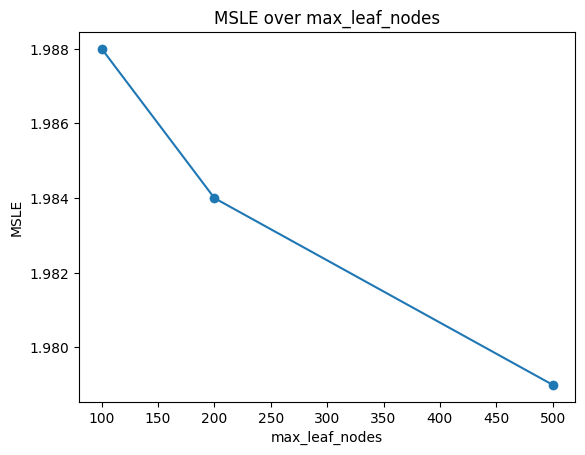

In [25]:
np.random.seed(1)

metrics = []

for max_leaf in max_leaf_nodes_list:
    pipe = Pipeline([("custom_transformer", MeanTargetEncoderNoise(object_cols, num_cols)),
                    ("tree", DecisionTreeRegressor(max_leaf_nodes=max_leaf))])

    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(X_test)

    score = round(mse(Y_test, y_pred), 3)
    metrics.append(score)

    print(f"max_leaf_nodes: {max_leaf}  MSLE == ", score)

plt.plot(max_leaf_nodes_list, metrics, marker="o", linestyle="-")
plt.title("MSLE over max_leaf_nodes")
plt.xlabel("max_leaf_nodes")
plt.ylabel("MSLE")
plt.show()

Подберите лучшую комбинацию параметров, используя `GridSearchCV` и набор массивов значений параметров из предыдущего задания. Для лучшей комбинации посчитайте MSLE на тестовой выборке. Получились ли лучшие параметры такими же, как если бы вы подбирали их по-отдельности при остальных гиперпараметрах по умолчанию (предыдущее задание)? (2б)

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "decision_tree__max_depth": [3, 5, 8, 12],
    "decision_tree__min_samples_split": [10, 50, 100, 500],
    "decision_tree__min_impurity_decrease": [0, 0.1, 0.15, 0.2],
    "decision_tree__max_leaf_nodes": [100, 200, 500]
}
np.random.seed(1)

### Your code is here

pipe = Pipeline([("custom_transformer", MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),
                 ("decision_tree", DecisionTreeRegressor())])

search = GridSearchCV(pipe, param_grid,
                      scoring="neg_mean_squared_error",
                      verbose=1,
                      n_jobs=-1)

search.fit(X_train, Y_train)
y_pred = search.predict(X_test)

print(f"Best CV MSLE: {search.best_score_:.2f}")
print(f"Test MSLE: {search.score(X_test, Y_test)}")
print(f"Best params: {search.best_params_}")


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best CV MSLE: -0.57
Test MSLE: -0.5229485887238029
Best params: {'decision_tree__max_depth': 3, 'decision_tree__max_leaf_nodes': 100, 'decision_tree__min_impurity_decrease': 0.1, 'decision_tree__min_samples_split': 10}
